# Определение перспективного тарифа для телеком-компании

# Краткое описание проекта

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df_internet = pd.read_csv('/datasets/internet.csv')
df_calls = pd.read_csv('/datasets/calls.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

In [3]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [4]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Набор данных internet содержит информацию о 149396 интернет-сессиях. Пропуски в наборе отсутствуют. Набор данных содержтит 5 столбцов со следующими типами:
- float64(1)
- int64(2)
- object(2)

In [5]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [6]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Набор данных internet содержит информацию о 202607 звонках. Пропуски в наборе отсутствуют. Набор данных содержтит 4 столбца со следующими типами:
- float64(1)
- int64(1)
- object(2)

In [7]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Набор данных messages содержит информацию о 123036 сообщениях. Пропуски в наборе отсутствуют. Набор данных содержтит 3 столбца со следующими типами:
- int64(1)
- object(2)

In [9]:
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Набор данных tariffs содержит информацию о двух тарифах. Пропуски в наборе отсутствуют. Набор данных содержтит 8 столбцов со следующими типами:
- int64(7)
- object(1)

In [11]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [12]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Набор данных users содержит информацию о 500 пользователей. Пропуски в столбце churn_rate означают, что если значение пропущено, то тариф ещё действовал на момент выгрузки данных Набор данных содержтит 8 столбцов со следующими типами:

- int64(2)
- object(6)

## Подготовка данных

### Приведем данные к нужным типам и исправим ошибки 

Из датасета internet выбросим столбец "Unnamed: 0", который дублирует индекс  

In [13]:
df_internet.drop('Unnamed: 0', 1, inplace = True)

Приведем session_date к datetime, а mb_used к float 32 с целью экономии памяти

In [14]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], 
                                             format='%Y-%m-%d')

df_internet['mb_used'] = df_internet['mb_used'].astype('float32')

В датасете calls приведем call_date к datetime, а duration к float 32 с целью экономии памяти

In [15]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], 
                                       format='%Y-%m-%d')

df_calls['duration'] = df_calls['duration'].astype('float32')

В датасете messages приведем message_date к datetime

In [16]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'],
                                             format='%Y-%m-%d')

В датасете users приведем reg_date к datetime

In [17]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'],
                                     format='%Y-%m-%d')

Проверим наличие строк-дубликатов в наборах данных

In [18]:
df_internet.duplicated().sum()

0

In [19]:
df_calls.duplicated().sum()

0

In [20]:
df_messages.duplicated().sum()

0

In [21]:
df_users.duplicated().sum()

0

Строк-дубликатов в данных не имеется

### Посчитаем для каждого пользователя следующие показатели:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет - трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [22]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [23]:
# округлим длительность разговора до минут
df_calls['duration'] = np.ceil(df_calls['duration'])

In [24]:
# создадим в исходной таблице столбец month 
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month

# воспользуемся сводной таблицей с аггрегацией значений продолжительности звонков
calls_amount = df_calls.pivot_table(index = ('user_id','month'),
                                    values = 'duration',
                                    aggfunc = ['count','sum']
                                   )

In [25]:
calls_amount

count      sum
              duration duration
user_id month                  
1000    5           22    159.0
        6           43    172.0
        7           47    340.0
        8           52    408.0
        9           58    466.0
...                ...      ...
1498    10          41    247.0
1499    9            9     70.0
        10          68    449.0
        11          74    612.0
        12          69    492.0

[3174 rows x 2 columns]

In [26]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month

messages_amount = df_messages.pivot_table(index = ('user_id','month'),
                                          values = 'id',
                                          aggfunc = ['count']
                                         )

In [27]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month


internet_amount = df_internet.pivot_table(index = ('user_id','month'),
                                          values = 'mb_used',
                                          aggfunc = 'sum'
                                         )

internet_amount['gb_used'] = (internet_amount.mb_used/1024).apply(np.ceil)

In [28]:
# объединим полученные таблицы
df_amount = internet_amount.merge(right = messages_amount, 
                                  how = 'outer', 
                                  left_index = True, 
                                  right_index = True).merge(right = calls_amount, 
                                                            how = 'outer', 
                                                            left_index = True, 
                                                            right_index = True)


/opt/conda/lib/python3.9/site-packages/pandas/core/reshape/merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [29]:
df_amount.columns

Index([            'mb_used',             'gb_used',       ('count', 'id'),
       ('count', 'duration'),   ('sum', 'duration')],
      dtype='object')

In [30]:
# переиминуем столбцы
df_amount = df_amount.rename(columns = {'mb_used':'mb_total',
                                        'gb_used':'gb_total',
                                        ('count', 'id'):'messages_number',
                                        ('count', 'duration'):'calls_number',
                                        ('sum', 'duration'):'calls_duration'}
                            )
                 

In [31]:
df_amount.head(3)

mb_total  gb_total  messages_number  calls_number  \
user_id month                                                          
1000    5       2253.489990       3.0             22.0          22.0   
        6      23233.769531      23.0             60.0          43.0   
        7      14003.639648      14.0             75.0          47.0   

               calls_duration  
user_id month                  
1000    5               159.0  
        6               172.0  
        7               340.0

In [32]:
df_amount.reset_index(inplace = True)

# удалим столбец mb_total
df_amount= df_amount.drop('mb_total', axis=1)

In [33]:
df_amount.head()

,user_id,month,gb_total,messages_number,calls_number,calls_duration
0,1000,5,3.0,22.0,22.0,159.0
1,1000,6,23.0,60.0,43.0,172.0
2,1000,7,14.0,75.0,47.0,340.0
3,1000,8,14.0,81.0,52.0,408.0
4,1000,9,15.0,57.0,58.0,466.0


In [34]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [35]:
df_users.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [36]:
# объединим полученную таблицу с информацией о тарифах и городах и возрасте пользователей
df_amount = df_amount.merge(df_users[['user_id', 'tariff', 'city', 'age']], on='user_id').merge(df_tariffs, 
                                                                                                left_on = 'tariff', 
                                                                                                right_on = 'tariff_name')

Убедимся, что получили то, что хотели

In [37]:
df_amount.sample(10)

,user_id,month,gb_total,messages_number,calls_number,calls_duration,tariff,city,age,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
2960,1443,11,17.0,21.0,101.0,761.0,smart,Казань,21,50,15360,500,550,200,3,3,smart
59,1039,10,24.0,140.0,80.0,576.0,ultra,Ярославль,40,1000,30720,3000,1950,150,1,1,ultra
587,1330,11,28.0,79.0,94.0,604.0,ultra,Нижний Новгород,65,1000,30720,3000,1950,150,1,1,ultra
2359,1301,9,1.0,NaN,10.0,65.0,smart,Махачкала,26,50,15360,500,550,200,3,3,smart
2044,1227,8,23.0,20.0,86.0,620.0,smart,Санкт-Петербург,66,50,15360,500,550,200,3,3,smart
2684,1386,9,31.0,53.0,69.0,352.0,smart,Новосибирск,21,50,15360,500,550,200,3,3,smart
2619,1372,2,10.0,29.0,62.0,560.0,smart,Магнитогорск,71,50,15360,500,550,200,3,3,smart
1333,1071,7,22.0,17.0,36.0,281.0,smart,Омск,20,50,15360,500,550,200,3,3,smart
1587,1134,1,10.0,32.0,42.0,332.0,smart,Красноярск,65,50,15360,500,550,200,3,3,smart
1323,1070,9,11.0,8.0,61.0,514.0,smart,Химки,20,50,15360,500,550,200,3,3,smart


Посчитаем помесячную выручку с каждого пользователя 

In [38]:
# перерасход сообщений
df_amount.loc[df_amount['messages_number'] > df_amount['messages_included'],
              'message_overspend'] = (df_amount['messages_number'] - df_amount['messages_included'])

# перерасход звоноков в минутах
df_amount.loc[df_amount['calls_duration'] > df_amount['minutes_included'],
              'minutes_overspend'] = (df_amount['calls_duration'].apply(np.ceil) - df_amount['minutes_included'])

# перерасход в гб
df_amount.loc[df_amount['gb_total'] > (df_amount['mb_per_month_included']/1024),
              'gb_overspend'] = (df_amount['gb_total'] - df_amount['mb_per_month_included']/1024)

# заменим пропуски в перерасходах на нули
df_amount[['message_overspend',
           'minutes_overspend', 
           'gb_overspend']] = df_amount[['message_overspend', 
                                         'minutes_overspend', 
                                         'gb_overspend']].fillna(0)
# выручка 
df_amount['revenue'] = (df_amount['message_overspend'] * df_amount['rub_per_message'] +
                        df_amount['minutes_overspend'] * df_amount['rub_per_minute'] +
                        df_amount['gb_overspend'] * df_amount['rub_per_gb'] + 
                        df_amount['rub_monthly_fee']
                       )


Найдем результирующий столбец с выручкой в конце таблицы

In [39]:
df_amount.sample(5)

,user_id,month,gb_total,messages_number,calls_number,calls_duration,tariff,city,age,messages_included,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,message_overspend,minutes_overspend,gb_overspend,revenue
2920,1433,4,19.0,96.0,66.0,406.0,smart,Подольск,71,50,...,500,550,200,3,3,smart,46.0,0.0,4.0,1488.0
1588,1134,2,13.0,47.0,59.0,458.0,smart,Красноярск,65,50,...,500,550,200,3,3,smart,0.0,0.0,0.0,550.0
309,1180,4,31.0,14.0,10.0,76.0,ultra,Москва,27,1000,...,3000,1950,150,1,1,ultra,0.0,0.0,1.0,2100.0
1080,1017,6,17.0,NaN,54.0,341.0,smart,Краснодар,73,50,...,500,550,200,3,3,smart,0.0,0.0,2.0,950.0
781,1392,4,15.0,33.0,67.0,436.0,ultra,Челябинск,54,1000,...,3000,1950,150,1,1,ultra,0.0,0.0,0.0,1950.0


## Исследовательский анализ

Проанализируем поведение клиентов оператора, исходя из выборки. Выясним сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.

In [40]:

# Посчитаем среднее количество, дисперсию и стандартное отклонение для показателей поведения пользователей и выручки 


cols = ['gb_total', 'messages_number', 'calls_number', 'calls_duration', 'revenue']

print('Тариф ultra:')

display(pd.DataFrame([df_amount.query('tariff == "ultra"')[cols].mean(),
                      df_amount.query('tariff == "ultra"')[cols].std(),
                      df_amount.query('tariff == "ultra"')[cols].var()], index=['Mean', 'Std. dev', 'Variance']))

print('Тариф smart:')

display(pd.DataFrame([df_amount.query('tariff == "smart"')[cols].mean(),
                      df_amount.query('tariff == "smart"')[cols].std(),
                      df_amount.query('tariff == "smart"')[cols].var()], index=['Mean', 'Std. dev', 'Variance']))

Тариф ultra:


,gb_total,messages_number,calls_number,calls_duration,revenue
Mean,19.694359,61.161006,76.016824,545.451111,2070.152284
Std. dev,9.702924,45.931026,42.403348,306.925751,376.187114
Variance,94.146736,2109.659183,1798.043927,94203.421875,141516.745079


Тариф smart:


,gb_total,messages_number,calls_number,calls_duration,revenue
Mean,16.336176,38.716441,58.621233,419.062988,1289.973531
Std. dev,5.737923,26.787949,25.796101,189.325623,818.404367
Variance,32.923756,717.594201,665.438829,35844.191406,669785.708006


Видим, что среднее количество сообщений, минут разговора, интернета и выручки на представленной выборке существенно различаются для разных тарифов. В среднем, пользователи ultra тратят больше трафика и приносят больше выручки по сравнению с пользователями smart. Однако разброс в данных о поведении пользователей, который характеризует значение дисперсии, существенно выше для тарифа ultra. Дисперсия выручки у тарифа ultra ниже чем у smart

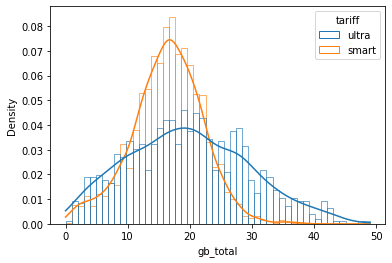

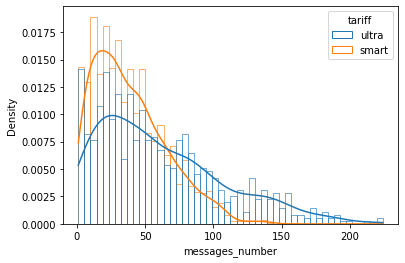

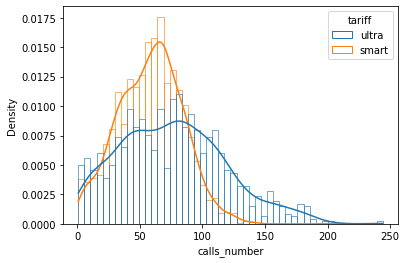

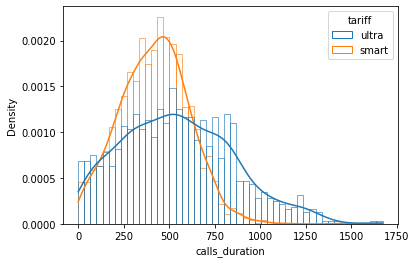

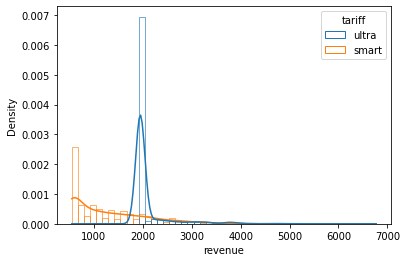

In [41]:
# Также, для наглядности, построим гистограммы для рассматриваемых показателей в зависимости от тарифа

for col in cols:    
    sns.histplot(data = df_amount, 
                 x = col, 
                 hue = 'tariff', 
                 kde = True,
                 bins = 50,
                 stat="density",
                 fill = False,
                 common_norm=False
                )
    plt.show()

Сделанные выводы подтверждаются: распределения для ultra менее плотные, дисперсия показателей поведения у пользователей ultra выше чем у пользователей smart. Пользователи ultra тратят больше телеком-трафика и приносят существенно больше выручки. Для выручки также видим, что распределение для smart, в отличии от ultra, имеет много значений выше своей абонентской платы 550 руб, то есть многим пользователям не хватает базового пакета трафика, установленного условиями тарифа. Пользователи ultra в большинстве своем укладываются в пакет трафика - хвост у распределения есть, но не такой выраженный

In [42]:
# Создадим столбец с обобщенной информацией о городе клиена (Москва или другой город)

df_amount.loc[df_amount['city'] == 'Москва','moscow_other'] = 'Moscow'
df_amount.loc[df_amount['city'] != 'Москва','moscow_other'] = 'other'

In [43]:
# Посчитаем статичстические параметры для показателей поведения пользователей и выручки в зависимости от города

cols = ['gb_total', 'messages_number', 'calls_number', 'calls_duration', 'revenue']

print('Москва:')

display(pd.DataFrame([df_amount.query('moscow_other == "Moscow"')[cols].mean(),
                      df_amount.query('moscow_other == "Moscow"')[cols].std(),
                      df_amount.query('moscow_other == "Moscow"')[cols].var()], index=['Mean', 'Std. dev', 'Variance']))

print('Другие города:')

display(pd.DataFrame([df_amount.query('moscow_other == "other"')[cols].mean(),
                      df_amount.query('moscow_other == "other"')[cols].std(),
                      df_amount.query('moscow_other == "other"')[cols].var()], index=['Mean', 'Std. dev', 'Variance']))

Москва:


,gb_total,messages_number,calls_number,calls_duration,revenue
Mean,18.050737,47.134420,65.544262,469.919678,1546.713584
Std. dev,7.645788,35.802837,33.107064,240.983322,752.088071
Variance,58.458076,1281.843119,1096.077676,58072.964844,565636.467012


Другие города:


,gb_total,messages_number,calls_number,calls_duration,revenue
Mean,17.195215,44.875562,63.426287,453.841644,1524.936227
Std. dev,7.262175,34.878386,32.568419,237.266281,808.787752
Variance,52.739182,1216.501811,1060.701938,56295.289062,654137.628522


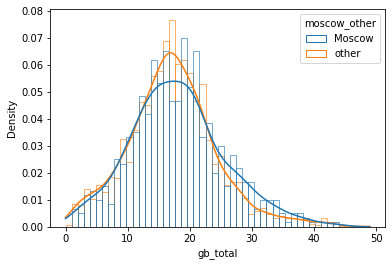

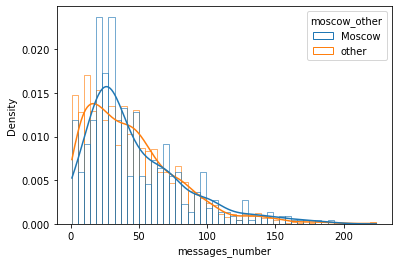

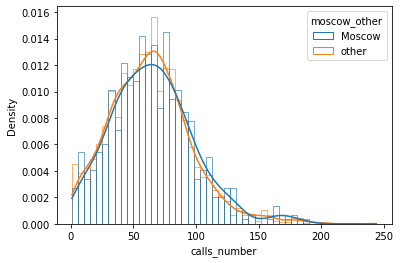

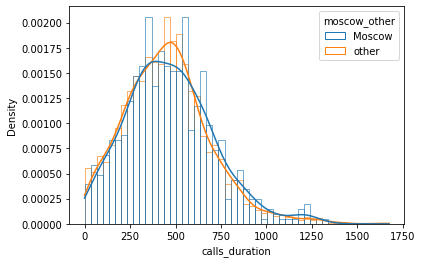

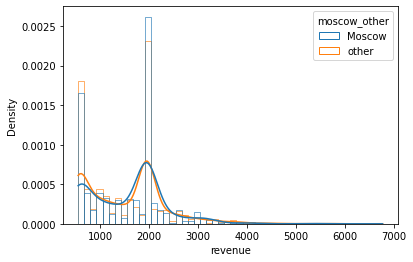

In [44]:
# Также, для наглядности, построим гистограммы для рассматриваемых показателей в зависимости от города

for col in cols:    
    sns.histplot(data = df_amount, 
                 x = col, 
                 hue = 'moscow_other', 
                 hue_order=["Moscow", "other"],
                 kde = True,
                 bins = 50,
                 stat="density",
                 fill = False,
                 common_norm = False
                )
    plt.show()

Распределения показателей поведения пользователей и выручки в зависимости от города практически не отличаются на представленной выборке: гистограммы по форме совпадают, отличия в статистических параметрах также минимально

Оценим как меняется средняя выручка по тарифам в зависимости от возраста клиента

<AxesSubplot:title={'center':'Средняя выручка тарифа ultra в зависимости от возраста пользователй'}, xlabel='age'>

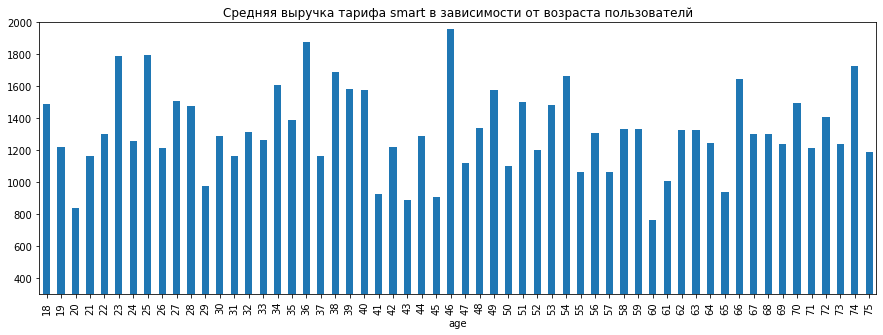

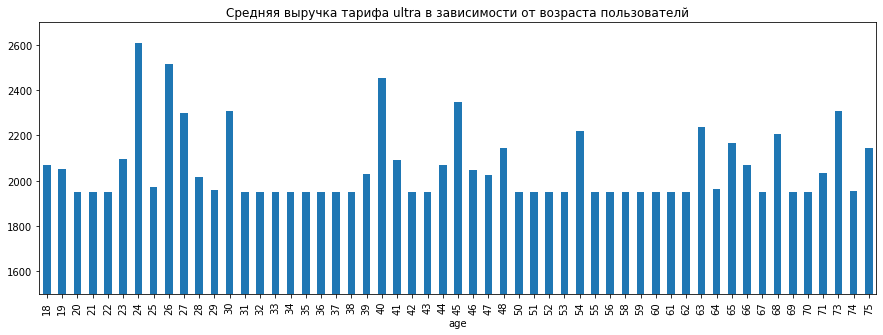

In [45]:
# Для тарифа smart

df_amount.query('tariff == "smart"').pivot_table(index = 'age',                           
                                                 values = 'revenue',
                                                 aggfunc = np.mean).plot(kind = 'bar',
                                                                         legend = False,
                                                                         title = 'Средняя выручка тарифа smart в зависимости от возраста пользователй',
                                                                         figsize=(15,5),
                                                                         ylim = (300, 2000)
                                                                        )
# Для тарифа ultra

df_amount.query('tariff == "ultra"').pivot_table(index = 'age',                           
                                                 values = 'revenue',
                                                 aggfunc = np.mean).plot(kind = 'bar',
                                                                         legend = False,
                                                                         title = 'Средняя выручка тарифа ultra в зависимости от возраста пользователй',
                                                                         figsize=(15,5),
                                                                         ylim = (1500, 2700)
                                                                        )

Видим, что средняя выручка в зависимости от возраста клиента меняется достаточно хаотично - каких-то четких паттернов и закономерностей на графиках не отмечаеется

## Проверка гипотез

Зададим пороговое значение alpha = 0.05

In [46]:
alpha = 0.05

### Cредние выручки пользователей тарифов «Ультра» и «Смарт» различаются

Сформулируем нулевую и альтернативную гипотезы:
- H0: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова
- H1: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Так как выручки пользователей разных тарифов не зависят друг от друга, будем сиспользовать t-test для сравнения средних значений двух независимых выборок

In [47]:
sample_ultra = df_amount.query('tariff == "ultra"')['revenue'] 
sample_smart = df_amount.query('tariff == "smart"')['revenue']

results_1 = st.ttest_ind(sample_ultra, 
                         sample_smart, 
                         equal_var = False) # не будем считать дисперсии выборок равными, было показано их различие

print('p-значение: ', results_1.pvalue)
print('Не отвергаем нулевую гипотезу') if results_1.pvalue >= alpha else print('Отвергаем нулевую гипотезу')

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Сформулируем нулевую и альтернативную гипотезы:

- H0: Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Так как выручки пользователей в разных городах не зависят друг от друга, будем сиспользовать t-test для сравнения средних значений двух независимых выборок

In [48]:
sample_Moscow = df_amount.query('moscow_other == "Moscow"')['revenue'] 
sample_other = df_amount.query('moscow_other == "other"')['revenue']

results_2 = st.ttest_ind(sample_Moscow, 
                         sample_other, 
                         equal_var = True) # будем считать дисперсии равными

print('p-значение: ', results_2.pvalue)

print('Не отвергаем нулевую гипотезу') if results_2.pvalue >= alpha else print('Отвергаем нулевую гипотезу')

p-значение:  0.5440152911670224
Не отвергаем нулевую гипотезу


Вывод:
- При проверке гипотезы о различии средней выручки пользователей тарифов «Ультра» и «Смарт», P-значение оказалось равным 4.2606313931076085e-250, что существенно меньше заданного порогового значения $\alpha$. Таким образом, H0 была отвергнута, что говорит о том, что седняя выручка пользователей тарифов «Ультра» и «Смарт» все таки различается.
- При проверке гипотезы о различии средней выручки пользователей из Москвы и других регионов P-значение оказалось равным 0.5440152911670224, что существенно выше заданного порогового значения $\alpha$. При таком высоком P-значении отвергнуть H0 не представляется возможным. Таким образом, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

 ## Общий вывод

В рамках проекта былы проведен анализ тарифов на выборке из 500 клиентов телеком-компании. Исходные данные были подготовлены и проверены на ошибки. Были посчитаны следующие параметры: 
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам
- помесячная выручка с каждого пользователя 

В ходе исследовательского анализа данных было показано, что среднее количество сообщений, минут разговора, интернета и выручки на представленной выборке существенно различаются для разных тарифов. В среднем, пользователи ultra тратят больше трафика и приносят больше выручки по сравнению с пользователями smart. Разброс в данных о поведении пользователей, который характеризует значение дисперсии, существенно выше для тарифа ultra. Дисперсия выручки у тарифа ultra ниже чем у smart. Пользователи ultra тратят больше телеком-трафика и приносят существенно больше выручки. Для выручки также видим, что распределение для smart, в отличии от ultra, имеет много значений выше своей абонентской платы 550 руб, то есть многим пользователям не хватает базового пакета трафика, установленного условиями тарифа. Пользователи ultra в большинстве своем укладываются в пакет трафика. Распределения показателей поведения пользователей и выручки в зависимости от города практически не отличаются на представленной выборке. Также было показано, что средняя выручка в зависимости от возраста клиента меняется достаточно хаотично - каких-то четких паттернов и закономерностей на графиках не отмечаеется.

В ходе статистического анализа были сформулированы нулевая и альтернативаня гипотезы о равенстве выручки для двух тарифов: 
- H0: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова
- H1: Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Проверка гипотез выполнялась с помощью T-теста для сравнения средних значений двух независимых выборок. P-значение оказалось равным 4.2606313931076085e-250, что существенно меньше заданного порогового значения alpha. Таким образом, H0 была отвергнута, что говорит о том, что седняя выручка пользователей тарифов «Ультра» и «Смарт» все таки различается.

Для сравнения средней выручки пользователей из Москвы и выручки пользователей из других регионов были сформулированы следующие нулевая и альтернативаня гипотезы:
- H0: Cредняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
- H1: Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

В данном случае также использовался T-тест для сравнения средних значений двух независимых выборок. P-значение оказалось равным 0.5440152911670224, что существенно выше заданного порогового значения alpha. При таком высоком P-значении отвергнуть H0 не представляется возможным. Таким образом, средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Резюмируя результаты проведенного анализа, можно заключить, что с точки зрения выручки для рассматриваемой телеком-компании, тариф ultra предпочтительней тарифа smart.

 